<a href="https://colab.research.google.com/github/hemanth-abhi850/Custom_convolution_using_multiplier/blob/main/Sumit_CNN_approx_Mult_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Limit to the first N samples (e.g., 10,000)
N = 60000 #training
M = 10000 #testing
X_train = X_train[:N]
y_train = y_train[:N]

X_test, y_test = X_test[:M], y_test[:M]

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

np.uint8(2)

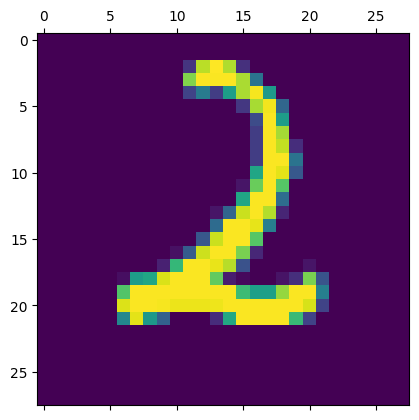

In [ ]:
test = 122
plt.matshow(X_train[test])
y_train[test]

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8546 - loss: 1.9476 - val_accuracy: 0.9721 - val_loss: 0.1009
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9771 - loss: 0.0789 - val_accuracy: 0.9729 - val_loss: 0.0916
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9825 - loss: 0.0582 - val_accuracy: 0.9737 - val_loss: 0.1016
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9859 - loss: 0.0446 - val_accuracy: 0.9785 - val_loss: 0.0831
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9897 - loss: 0.0332 - val_accuracy: 0.9776 - val_loss: 0.0942
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9737 - loss: 0.1064
Test Accuracy: 97.76%


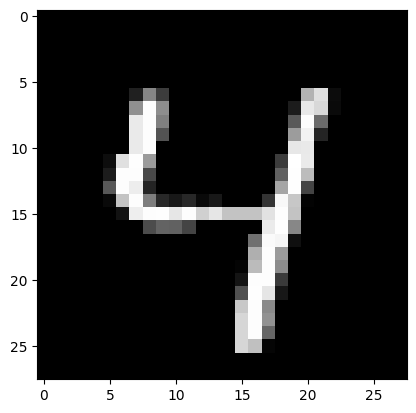

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Digit: 4
Actual Label: 4


In [ ]:
test_img_value = 210
image = X_test[test_img_value]

# Display the selected image
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Reshape the image for prediction (CNN expects batch dimension)
image = image.reshape(1, 28, 28, 1)  # Add batch dimension

# Predict the class
predicted_label = model.predict(image)
predicted_digit = np.argmax(predicted_label)  # Get the class with highest probability

print(f"Predicted Digit: {predicted_digit}")
print(f"Actual Label: {y_test[test_img_value]}")


Approximate Mutliplier

In [ ]:
def Exact_FA(a, b, cin):
    # Sum = A ⊕ B ⊕ Cin
    sum_ = a ^ b ^ cin
    # Carry = (A & B) | (Cin & (A ^ B))
    carry = (a & b) | (cin & (a ^ b))
    return sum_, carry

def approx_FA(a, b, cin):


    # #Design4
    # sum_ = b | cin
    # carry = a
    # return sum_, carry

    # #Design1
    # sum_ = (~a) & (b | cin)
    # carry = a
    # return sum_, carry

    # #Design1
    # sum_ = ((~a) & cin) | b
    # carry = a
    # return sum_, carry

    # #Design3
    # sum_ = a | b
    # carry = a
    # return sum_, carry


    #Design3
    sum_ = ~(~(a | b)|cin)
    carry = a
    return sum_, carry



def eight_bit_rca(a, b):
    s0, c0 = approx_FA((a >> 0) & 1, (b >> 0) & 1, 0)
    s1, c1 = approx_FA((a >> 1) & 1, (b >> 1) & 1, c0)
    s2, c2 = approx_FA((a >> 2) & 1, (b >> 2) & 1, c1)
    s3, c3 = approx_FA((a >> 3) & 1, (b >> 3) & 1, c2)
    s4, c4 = Exact_FA((a >> 4) & 1, (b >> 4) & 1, c3)
    s5, c5 = Exact_FA((a >> 5) & 1, (b >> 5) & 1, c4)
    s6, c6 = Exact_FA((a >> 6) & 1, (b >> 6) & 1, c5)
    s7, c7 = Exact_FA((a >> 7) & 1, (b >> 7) & 1, c6)
    s8 = c7  # 9th bit (carry out)

    result = (s8 << 8) | (s7 << 7) | (s6 << 6) | (s5 << 5) | (s4 << 4) | (s3 << 3) | (s2 << 2) | (s1 << 1) | s0
    return result  # 9-bit result









#LOG Encoder

def log_enc(A: int) -> int:
    if not (0 <= A < 256):
        raise ValueError("A must be an 8-bit integer (0-255).")

    # Encoding X based on leading 1 detection
    if A & 0b10000000:
        X = 0b111
    elif A & 0b01000000:
        X = 0b110
    elif A & 0b00100000:
        X = 0b101
    elif A & 0b00010000:
        X = 0b100
    elif A & 0b00001000:
        X = 0b011
    elif A & 0b00000100:
        X = 0b010
    elif A & 0b00000010:
        X = 0b001
    elif A & 0b00000001:
        X = 0b000
    else:
        X = 0b000  # Default case

    # Calculating Y values
    A_bits = [(A >> i) & 1 for i in range(8)]  # Extracting bits as list

    Y0 = A_bits[1]  # Always 0
    Y1 = 0
    Y2 = 0
    Y3 = 1

    Y = (Y3 << 3) | (Y2 << 2) | (Y1 << 1) | Y0  # Combining Y bits
    B = (X << 4) | Y  # Final 7-bit output

    return B

# ANTILOG Encoder

def antilog_enc(A: int) -> int:
    if not (0 <= A < 256):
        raise ValueError("A must be an 8-bit integer (0-255).")

    # Encoding X based on the value of A[7:4]
    X = 1 << (A >> 4 & 0xF)  # Shift '1' to the position of A[7:4]

    # Extracting bits from A for Y calculation (A[7] to A[0])
    A_bits = [(A >> i) & 1 for i in range(8)]  # Extracting bits as list

    # Calculating Y values based on bitwise operations (same as Verilog code)
    Y = [0] * 16
    Y[0] = 1
    Y[1] = A_bits[1]
    Y[2] = A_bits[1]
    Y[3] = A_bits[1]

    Y[4] = A_bits[1]
    Y[5] = 0
    Y[6] = 0
    Y[7] = 0

    Y[8] = A_bits[1]
    Y[9] = 0
    Y[10] = 0
    Y[11] = 0

    Y[12] = 0
    Y[13] = 0
    Y[14] = 0
    Y[15] = 0


    # Convert Y from list to integer representation
    Y_int = sum(Y[i] << i for i in range(16))

    # Perform bitwise OR operation
    B = X | Y_int

    return B


# Approximate Multiplier

def Approx_mult(A, B):
    # Call log_ENC for A and B to get R and S (assuming log_enc returns integers)
    R = log_enc(A)
    S = log_enc(B)

    # Calculate T = R + S (Since R and S are integers, we just add them)
    # T = R + S
    T = eight_bit_rca(R,S)
    # Call antilog_ENC with T to get the approximate output
    Out = antilog_enc(T)

    # Exact multiplication (This will be a 16-bit output)
    #Exact_out = A * B

    #return Out, Exact_out
    return Out



In [ ]:
Approx_mult(205,25)

4097

In [ ]:
from numba import njit
from numba import jit

In [ ]:

def convolution_loops(image, filter, output_image, step):
    output_height, output_width = output_image.shape

    for i in range(0, output_height, step):
        for j in range(0, output_width, step):
            patch_from_image = image[i:i+filter.shape[0], j:j+filter.shape[1]]

            # Manual element-wise multiplication
            element_wise_result = np.zeros_like(patch_from_image)
            for m in range(filter.shape[0]):
                for n in range(filter.shape[1]):
                    # element_wise_result[m, n] = patch_from_image[m, n] * filter[m, n]
                    # element_wise_result[m, n] = Binary_Multiply8_half_approx(int(patch_from_image[m, n]), int(filter[m, n]))
                    element_wise_result[m, n] = Approx_mult(int(patch_from_image[m, n]), int(filter[m, n]))

            # Summing the element-wise multiplied values
            output_image[i, j] = np.sum(element_wise_result)

    return output_image

In [ ]:
def convolution_2d(image, filter, pad=0, step=1):
    # Ensure image and filter are NumPy arrays
    if isinstance(image, tf.Tensor):
        image = image.numpy()
    if isinstance(filter, tf.Tensor):
        filter = filter.numpy()

    # Compute output dimensions
    output_height = (image.shape[0] - filter.shape[0]) // step + 1
    output_width = (image.shape[1] - filter.shape[1]) // step + 1

    # Initialize output image
    output_image = np.zeros((output_height, output_width))

    # Call the optimized function
    output_image = convolution_loops(image, filter, output_image, step)

    return output_image

In [ ]:


# Optimized CNN Layer Function
def cnn_layer(image_volume, filter, pad=1, step=1):
    k_size = filter.shape[1]  # Kernel size
    n_filters = filter.shape[0]  # Number of filters

    # Compute output dimensions
    width_out = (image_volume.shape[0] - k_size + 2 * pad) // step + 1
    height_out = (image_volume.shape[1] - k_size + 2 * pad) // step + 1

    # Ensure correct padding
    image_padded = np.pad(image_volume, ((pad, pad), (pad, pad), (0, 0)), mode='constant')

    # Prepare output feature maps
    feature_maps = np.zeros((width_out, height_out, n_filters))

    # Apply convolution across filters
    for i in range(n_filters):
        convolved_image = np.sum(
            [
                convolution_2d(image_padded[:, :, j], filter[i, :, :, j], pad=0, step=step)
                for j in range(image_volume.shape[-1])
            ],
            axis=0
        )

        # Ensure the output shape matches expected shape
        feature_maps[:, :, i] = convolved_image[:width_out, :height_out]  # Trim excess padding

    return feature_maps



In [ ]:
class CustomConv2D(layers.Layer):
    def __init__(self, filters, kernel_size, strides=1, padding=1, predefined_kernel=None, **kwargs):
        super(CustomConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.predefined_kernel = predefined_kernel  # New parameter

    def build(self, input_shape):
        # Initialize trainable filters (compatible with NumPy-based function)
        if self.predefined_kernel is not None:
            # Convert to NumPy if it's a Tensor
            if isinstance(self.predefined_kernel, tf.Tensor):
                self.predefined_kernel = self.predefined_kernel.numpy()
            kernel_initializer = tf.constant_initializer(self.predefined_kernel)
        else:
            kernel_initializer = "glorot_uniform"

        self.kernel = self.add_weight(
            shape=(self.filters, self.kernel_size, self.kernel_size, input_shape[-1]),
            initializer=kernel_initializer,
            trainable=True,
        )

    def call(self, inputs):
        def numpy_convolution(inputs_np, kernel_np):
            """ Wrapper function to apply NumPy convolution per batch """
            batch_size = inputs_np.shape[0]
            output_list = []

            for i in range(batch_size):
                output = cnn_layer(inputs_np[i], kernel_np, pad=self.padding, step=self.strides)
                output_list.append(output)

            return np.array(output_list, dtype=np.float32)  # Convert back to NumPy array

        # Use tf.py_function to execute NumPy-based convolution in TensorFlow
        output = tf.py_function(func=numpy_convolution, inp=[inputs, self.kernel], Tout=tf.float32)

        # Calculate output shape based on input shape
        batch_size = tf.shape(inputs)[0]
        height = (tf.shape(inputs)[1] - self.kernel_size + 2 * self.padding) // self.strides + 1
        width = (tf.shape(inputs)[2] - self.kernel_size + 2 * self.padding) // self.strides + 1

        # Ensure proper shape so Flatten() can work
        output = tf.reshape(output, (batch_size, height, width, self.filters))

        return output

# **Define a predefined 3x3 kernel (Example: Edge Detection)**
predefined_kernel = np.array([
    [[[1]], [[0]], [[0]]],
    [[[0]], [[ 1]], [[0]]],
    [[[0]], [[0]], [[1]]]
], dtype=np.float32)  # Shape: (3, 3, 1)

# Expand dimensions to match expected shape (filters, kernel_size, kernel_size, input_channels)
predefined_kernel = np.expand_dims(predefined_kernel, axis=0)  # Add filters dimension



In [ ]:
# **Using the custom layer in a Keras model**
model_apprx = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    CustomConv2D(filters=1, kernel_size=3, strides=1, padding=1, predefined_kernel=predefined_kernel),  # Using predefined kernel
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Print model summary
model_apprx.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_conv2d_12 (CustomConv2D)      │ (None, 28, 28, 1)           │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 14, 14, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │          25,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,515 (103.57 KB)

 Trainable params: 26,515 (103.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model_apprx = keras.Sequential([
#     CustomConv2D(filters=1, kernel_size=3, strides=1, padding=1, predefined_kernel=predefined_kernel),  # Using predefined kernel
#     layers.MaxPooling2D(2, 2),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model_apprx.summary()

In [ ]:
model_apprx.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_apprx.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

test_loss, test_acc = model_apprx.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Epoch 1/5
1466/1875 ━━━━━━━━━━━━━━━━━━━━ 16:43 2s/step - accuracy: 0.7789 - loss: 86.1100

In [ ]:
# model_apprx.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model_apprx.fit(X_train, y_train, epochs=5)

In [ ]:
test_loss, test_accuracy = model_apprx.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8862 - loss: 27.1776
Test Accuracy: 85.25%


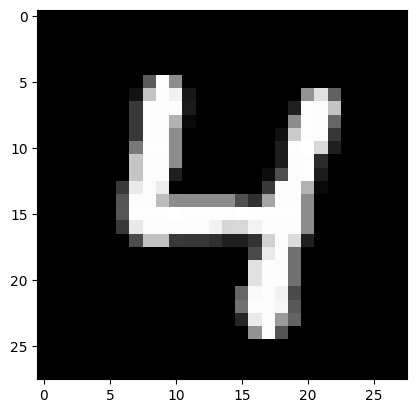

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted Digit: 4
Actual Label: 4
Confidence: 100.00%


In [ ]:
test_img_value = 56
image = X_test[test_img_value]

# Display the selected image
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Reshape the image for prediction (CNN expects batch dimension)
image = image.reshape(1, 28, 28, 1)  # Add batch dimension

# Predict the class
predicted_label = model.predict(image)
predicted_digit = np.argmax(predicted_label)  # Get the class with highest probability
confidence = np.max(predicted_label) * 100

print(f"Predicted Digit: {predicted_digit}")
print(f"Actual Label: {y_test[test_img_value]}")
print(f"Confidence: {confidence:.2f}%")
